In [ ]:
# Author: Janssen Kotah
# snRNAseq analysis for WT/SHIP1 KO mice as part of Matera et al. project
# CellChat analysis based on package vignette: https://github.com/sqjin/CellChat


In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(CellChat)

Warning message:
“package ‘Seurat’ was built under R version 4.1.3”
The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph

Warning message:
“package ‘igraph’ was built under R version 4.1.3”

Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/bcn/p310674/anaconda3/envs/R_cellchat/lib/libopenblasp-r0.3.23.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] CellChat_1.6.1      Biobase_2.54.0      BiocGenerics_0.40.0
[4] igraph_1.3.5        ggplot2_3.4.4       dplyr_1.1.2        
[7] SeuratObject_4.1.3  Seurat_4.3.0       

loaded via a namespace (and not attached):
  [1] backports_1.4.1        uuid_1.1-0             circlize_0.4.15       
  [4]

In [2]:
cells <- readRDS("../04. Analysis_resequencing_2/003E1_final_cells_annotated.rds")


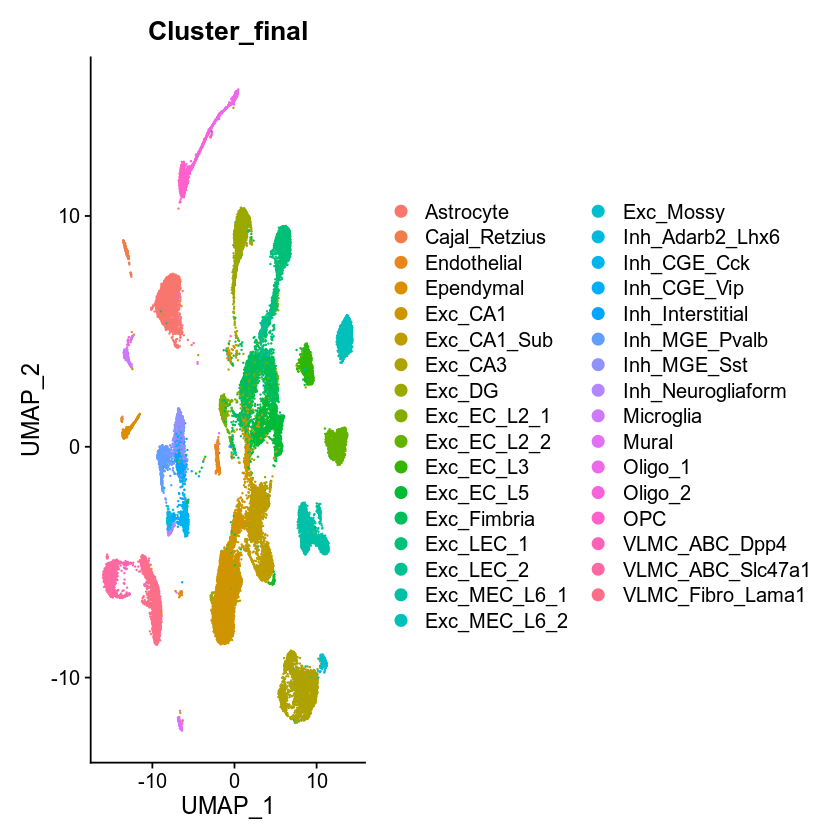

In [3]:
DimPlot(cells, group.by = "Cluster_final")

In [4]:
# do WT and KO separately, then combine
seu_WT = subset(cells, Genotype == "WT")
seu_WT

An object of class Seurat 
24356 features across 26998 samples within 1 assay 
Active assay: RNA (24356 features, 2062 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [11]:
Idents(seu_WT) = "Cluster_final"
seu_WT$Cluster_final %>%  table()

.
        Astrocyte     Cajal_Retzius       Endothelial         Ependymal 
             1864               224               142               227 
          Exc_CA1       Exc_CA1_Sub           Exc_CA3            Exc_DG 
             3317              2298              2012               935 
      Exc_EC_L2_1       Exc_EC_L2_2         Exc_EC_L3         Exc_EC_L5 
              359              1071               722              1613 
      Exc_Fimbria         Exc_LEC_1         Exc_LEC_2      Exc_MEC_L6_1 
             2312              1813               226              1712 
     Exc_MEC_L6_2         Exc_Mossy   Inh_Adarb2_Lhx6       Inh_CGE_Cck 
             1027               171                67               281 
      Inh_CGE_Vip  Inh_Interstitial     Inh_MGE_Pvalb       Inh_MGE_Sst 
               62               261               478               475 
Inh_Neurogliaform         Microglia             Mural           Oligo_1 
              125               165              

In [12]:
seu_WT <- NormalizeData(seu_WT)
data.input <- GetAssayData(seu_WT, assay = "RNA", slot = "data") # normalized data matrix

In [13]:
meta = data.frame(labels = seu_WT@meta.data$Cluster_final, row.names = colnames(seu_WT))
unique(rownames(meta)) %>% length()

[1] 26998

In [19]:
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "labels")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Astrocyte Cajal_Retzius Endothelial Ependymal Exc_CA1 Exc_CA1_Sub Exc_CA3 Exc_DG Exc_EC_L2_1 Exc_EC_L2_2 Exc_EC_L3 Exc_EC_L5 Exc_Fimbria Exc_LEC_1 Exc_LEC_2 Exc_MEC_L6_1 Exc_MEC_L6_2 Exc_Mossy Inh_Adarb2_Lhx6 Inh_CGE_Cck Inh_CGE_Vip Inh_Interstitial Inh_MGE_Pvalb Inh_MGE_Sst Inh_Neurogliaform Microglia Mural Oligo_1 Oligo_2 OPC VLMC_ABC_Dpp4 VLMC_ABC_Slc47a1 VLMC_Fibro_Lama1 


In [20]:
levels(cellchat@idents)
groupSize <- as.numeric(table(cellchat@idents))
groupSize

[1] "Astrocyte"         "Cajal_Retzius"     "Endothelial"      
 [4] "Ependymal"         "Exc_CA1"           "Exc_CA1_Sub"      
 [7] "Exc_CA3"           "Exc_DG"            "Exc_EC_L2_1"      
[10] "Exc_EC_L2_2"       "Exc_EC_L3"         "Exc_EC_L5"        
[13] "Exc_Fimbria"       "Exc_LEC_1"         "Exc_LEC_2"        
[16] "Exc_MEC_L6_1"      "Exc_MEC_L6_2"      "Exc_Mossy"        
[19] "Inh_Adarb2_Lhx6"   "Inh_CGE_Cck"       "Inh_CGE_Vip"      
[22] "Inh_Interstitial"  "Inh_MGE_Pvalb"     "Inh_MGE_Sst"      
[25] "Inh_Neurogliaform" "Microglia"         "Mural"            
[28] "Oligo_1"           "Oligo_2"           "OPC"              
[31] "VLMC_ABC_Dpp4"     "VLMC_ABC_Slc47a1"  "VLMC_Fibro_Lama1"

[1] 1864  224  142  227 3317 2298 2012  935  359 1071  722 1613 2312 1813  226
[16] 1712 1027  171   67  281   62  261  478  475  125  165  141  247  231  390
[31]   70  681 1279

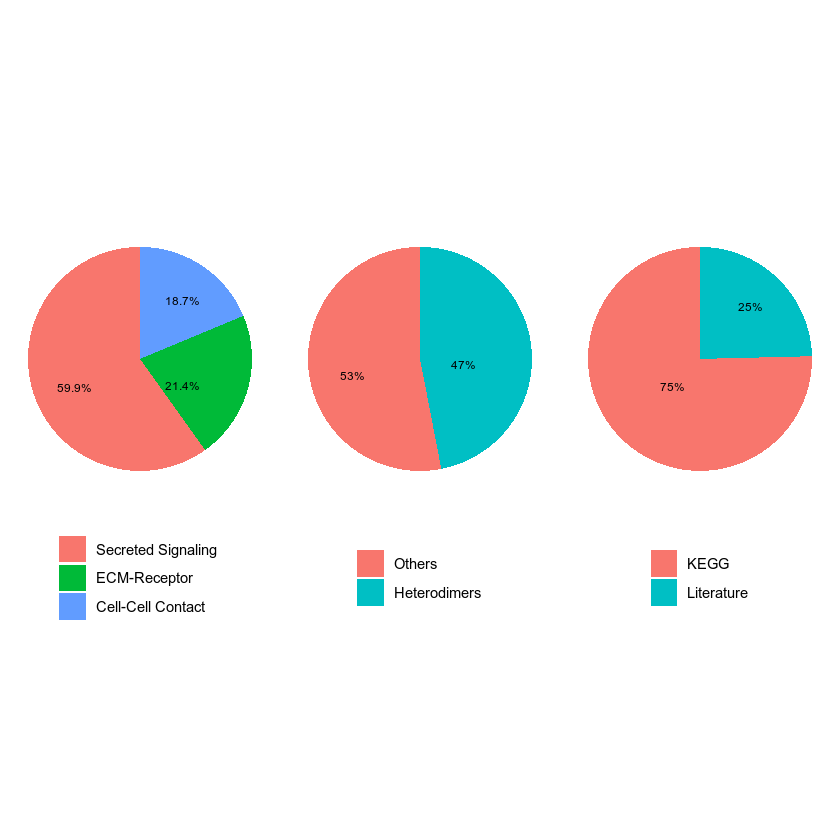

In [21]:
CellChatDB <- CellChatDB.mouse
showDatabaseCategory(CellChatDB)

In [23]:
# remove two interaction terms that had errors/warnings,
# solution is from github.com/sqjin/CellChat/issues/45
which(CellChatDB[["interaction"]]$ligand == "H2-BI")
CellChatDB[["interaction"]] <- CellChatDB[["interaction"]][-1887,]


[1] 1887

In [25]:
which(CellChatDB[["interaction"]]$ligand == "H2-Ea-ps")
CellChatDB[["interaction"]] <- CellChatDB[["interaction"]][-1900,]


[1] 1900

In [26]:
cellchat@DB <- CellChatDB

In [27]:
print(Sys.time())
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

[1] "2024-03-06 22:33:49 CET"


In [28]:
print(Sys.time())
cellchat <- projectData(cellchat, PPI.mouse) 
cellchat <- computeCommunProb(cellchat)

[1] "2024-03-06 22:38:15 CET"
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-03-06 22:38:23]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-03-06 22:49:21]"


In [29]:
print(Sys.time())
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)


[1] "2024-03-06 22:49:21 CET"


In [33]:
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

saveRDS(cellchat, "001A_CellChat_all_clusters_WT.rds")